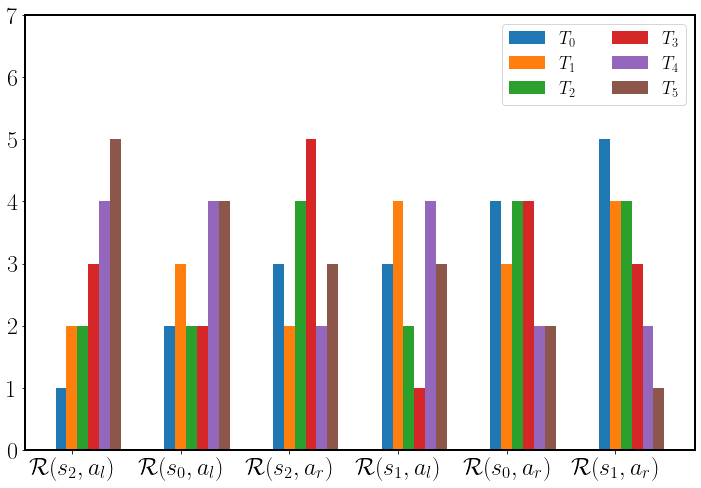

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm


class ToyMDP:
    def __init__(self, reward_weight, uncertain_prob=None):
        """
        
        """
        
        self.reward_weight = reward_weight
        self.uncertain_prob = uncertain_prob
        self.s0 = 0
        self.s1 = 1
        self.s2 = -1
        self.goal = 2
        self.trap = -2
        self.states = [self.trap, self.s2, self.s0, self.s1, self.goal]        
        self.a_r = 1
        self.a_l = -1
        self.actions = [self.a_r, self.a_l] # right, left
        self.reward_weight = reward_weight
        # reward features
        self.reward_features = np.array([[self.s2, self.a_l], 
                                    [self.s0, self.a_l], 
                                    [self.s2, self.a_r], 
                                    [self.s1, self.a_l],
                                    [self.s0, self.a_r], 
                                    [self.s1, self.a_r]])
        # dynamics features                                    
        self.prob_features = np.array([[self.s2, self.a_l], 
                                    [self.s0, self.a_l], 
                                    [self.s2, self.a_r], 
                                    [self.s1, self.a_l],
                                    [self.s0, self.a_r], 
                                    [self.s1, self.a_r]])

    def reward_func(self):
        reward_weight = np.array(self.reward_weight).reshape(-1, 1)
        rewards = np.matmul(self.reward_features, self.reward_weight)
        rewards += 3  # add bias to make reward positive 
        rewards = np.squeeze(rewards).tolist()
        return rewards

    def dynamics(self, state, action):
        if self.uncertain_prob is not None:
            if np.random.rand() < self.uncertain_prob:
                idx = np.random.randint(4)
                action = self.action_dict[idx]
        next_state = list(np.array(state) + np.array(action))
        next_state = [min(max(next_state[0], 0), 3), min(max(next_state[1], 0), 3)]
        return next_state

    def step(self, state, action):
        # get state from state id
        state = self.state_dict[state_id]
        # get action from action id
        action = self.action_dict[action_id]
        # take action
        next_state = self.dynamics(state, action)
        reward = self.reward_func(state, action, next_state)
        # get state id from state
        next_state_id = self._get_id_from_state(next_state)
        return next_state_id, reward

    def plot_rewards(self, rewards_cache=None):
        plt.rcParams['text.usetex'] = True
        rewards = self.reward_func()
        plt.figure(figsize=(12, 8))
        x = [i for i in range(len(rewards))]
        plt.bar(np.array(x)-.10, rewards, width=0.10, ls='--', lw=2.0, fill=True, label='$T_0$')

        if rewards_cache is not None:
            for k in range(len(rewards_cache)):
                plt.bar(np.array(x)+k*0.10, rewards_cache[k], width=0.10, ls='--', lw=2.0, fill=True, label=f'$T_{k+1}$')
            

        plt.ylim([0, 7])
        plt.xticks(x, ['$\mathcal{R}(s_2, a_l)$', '$\mathcal{R}(s_0, a_l)$', '$\mathcal{R}(s_2, a_r)$',
                       '$\mathcal{R}(s_1, a_l)$', '$\mathcal{R}(s_0, a_r)$', '$\mathcal{R}(s_1, a_r)$'])
        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)
        plt.rcParams['axes.linewidth'] = 2.0
        plt.legend(fontsize=18, ncol=2)
        plt.savefig('figures/rewards.png', dpi=300)


def _task_sim(Ws, Wt):
    cosine_sim = np.dot(Ws, Wt)/(norm(Ws)*norm(Wt))
    return cosine_sim
    
  
def _plot_sim(sim_array):
        plt.rcParams['text.usetex'] = True
        plt.figure(figsize=(12, 8))
        x = [i for i in range(len(sim_array))]
        plt.plot(np.array(x), sim_array, '--o', markersize=15, 
                markerfacecolor='none', markeredgecolor='r', lw=2.0, 
                markeredgewidth=3.0)
        tick_labels = [f'sim($T_0, T_{i+1}$)' for i in range(len(sim_array))]
        plt.xticks(x, tick_labels)

        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)
        plt.rcParams['axes.linewidth'] = 2.0
        plt.savefig('figures/task_sim.png', dpi=300)




reward_weight0 = [1, 1]
reward_weight1 = [1, 0]
reward_weight2 = [0, 1]
reward_weight3 = [-1, 1]
reward_weight4 = [0, -1]
reward_weight5 = [-1, -1]

mdp0 = ToyMDP(reward_weight0)
mdp1 = ToyMDP(reward_weight1)
mdp2 = ToyMDP(reward_weight2)
mdp3 = ToyMDP(reward_weight3)
mdp4 = ToyMDP(reward_weight4)
mdp5 = ToyMDP(reward_weight5)

rewards1 = mdp1.reward_func()
rewards2 = mdp2.reward_func()
rewards3 = mdp3.reward_func()
rewards4 = mdp4.reward_func()
rewards5 = mdp5.reward_func()


rewards_cache = [rewards1, rewards2, rewards3, rewards4, rewards5] 

mdp0.plot_rewards(rewards_cache=rewards_cache)

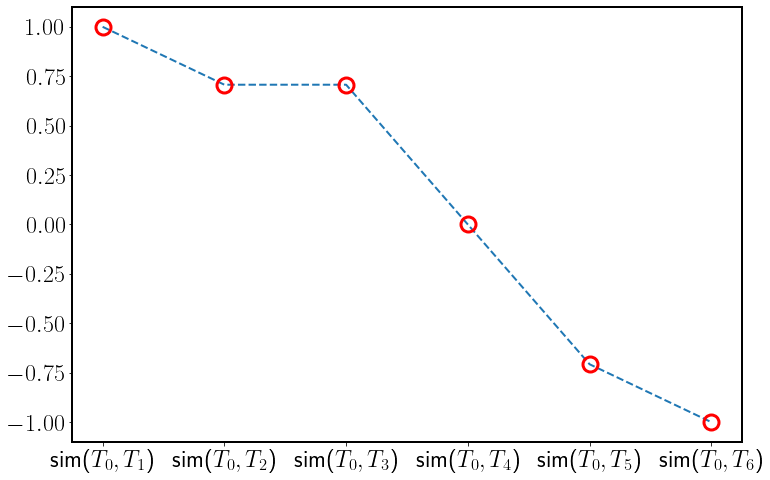

In [4]:
sim0 =_task_sim(reward_weight0, reward_weight0)
sim1 =_task_sim(reward_weight0, reward_weight1)
sim2 =_task_sim(reward_weight0, reward_weight2)
sim3 =_task_sim(reward_weight0, reward_weight3)
sim4 =_task_sim(reward_weight0, reward_weight4)
sim5 =_task_sim(reward_weight0, reward_weight5)

r_sim = [sim0, sim1, sim2, sim3, sim4, sim5]

_plot_sim(r_sim)